<a href="https://colab.research.google.com/github/Rahul-dsml/Myprojects/blob/main/CIFAR_10_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets
from torchvision import transforms
import torch
import torch.nn as nn
import numpy as np

In [2]:
rootdir= '/content/drive/MyDrive/NLP'
T= datasets.CIFAR10(rootdir, train=True, download=True)
V= datasets.CIFAR10(rootdir, train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/NLP/cifar-10-python.tar.gz to /content/drive/MyDrive/NLP
Files already downloaded and verified


In [3]:
len(T)

50000

In [4]:
len(V)

10000

In [5]:
type(T)

torchvision.datasets.cifar.CIFAR10

In [6]:
X,y= T[15]

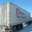

In [7]:
X

In [8]:
y

9

In [9]:
np.array(X).shape

(32, 32, 3)

In [10]:
32*32*3

3072

In [11]:
rootdir= '/content/drive/MyDrive/NLP'
T= datasets.CIFAR10(rootdir, train=True, download=True, transform=transforms.ToTensor())
V= datasets.CIFAR10(rootdir, train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [12]:
T_Loader= torch.utils.data.DataLoader(T, batch_size=64, shuffle=True, drop_last=True)
V_Loader= torch.utils.data.DataLoader(V, batch_size=64, shuffle=True, drop_last=True)

In [13]:
model= nn.Sequential(
    nn.Linear(3072, 100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100,10),
    nn.LogSoftmax(dim=1)

)

In [14]:
loss_fn= nn.NLLLoss()

In [17]:
optimizer= torch.optim.Adam(model.parameters(), lr= 0.01)
scheduler= torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, len(T_Loader))

In [18]:
nepochs=5
for e in range(nepochs):
  eLoss=0
  for X,y in T_Loader:
    batch_size= X.shape[0]
    y_hat= model(X.view(batch_size, -1))
    loss= loss_fn(y_hat, y)
    eLoss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  scheduler.step()
  print(float(eLoss))

1831.4696044921875
1799.121826171875
1802.6669921875
1799.05908203125
1799.04833984375


In [19]:
c = 0
t=0
with torch.no_grad():
  for Xv,yv in V_Loader:
    batch_size= Xv.shape[0]
    y_hat= model(Xv.view(batch_size, -1))
    _,p= torch.max(y_hat, dim=1)
    t+= yv.shape[0]
    c+= int((p==yv).sum())
print(c/t)

0.0999599358974359
